In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from model import print_results, MonoexponentialModel, make_exp_data

# Общие параметры моделирования

In [2]:
NUM_EXAMPLES = 1000

# TIME_CONSTANT = 0.2
TIME_CONSTANT = 0.005
# TIME_CONSTANT = 0.0002

AMPL = 3.0
F_PULSE = 20 * 10 ** (-6)

STDDEV = 0.2

LEARNING_RATE = 0.1

# Генерация экспериментальных данных

In [3]:
frequency, actual_dlts = make_exp_data(f_pulse=F_PULSE,
                                       time_constant=TIME_CONSTANT,
                                       ampl=AMPL,
                                       std_dev=STDDEV,
                                       num_ex=NUM_EXAMPLES)

# Модель до оптимизации параметров

Initial values:
Time constant power = -2.0000 log10(s)
Time constant = 0.0100 s
Amplitude = 1.0000 pF
MSE = 1.1796
RMSE = 1.086071


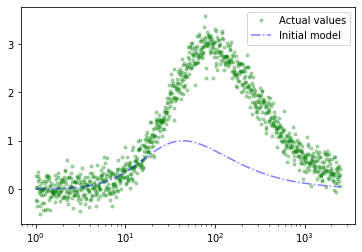

In [4]:
initial_model = MonoexponentialModel(filling_pulse=20 * 10 ** (-6))

print_results(frequency = frequency, 
              actual_dlts = actual_dlts,
              initial_model = initial_model)

# Оптимизация модели простым градиентным спуском

Initial values:
Time constant power = -2.0000 log10(s)
Time constant = 0.0100 s
Amplitude = 1.0000 pF
MSE = 1.1796
RMSE = 1.086071

Final values:
Time constant power = -2.2946 log10(s)
Time constant = 0.0051 s
Amplitude = 2.9779 pF
MSE = 0.0408
RMSE = 0.201903


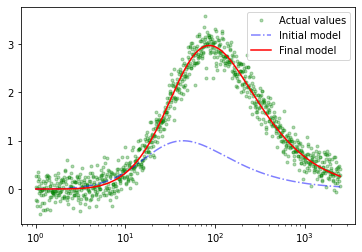

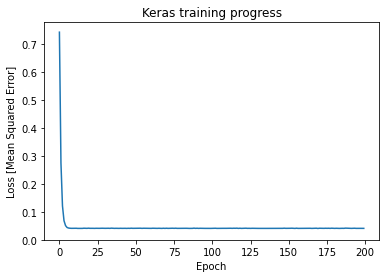

In [5]:
final_model = MonoexponentialModel()

final_model.compile(run_eagerly=False,
                    loss=tf.keras.losses.MSE,
                    optimizer=tf.optimizers.SGD(learning_rate=LEARNING_RATE))

history = final_model.fit(frequency, actual_dlts, epochs=200, batch_size=100, verbose=False)

print_results(frequency = frequency,
              actual_dlts = actual_dlts,
              initial_model = initial_model,
              final_model = final_model,
              history = history
             )

# Оптимизация параметров модели алгоритмом Adagrad

Initial values:
Time constant power = -2.0000 log10(s)
Time constant = 0.0100 s
Amplitude = 1.0000 pF
MSE = 1.1796
RMSE = 1.086071

Final values:
Time constant power = -2.2996 log10(s)
Time constant = 0.0050 s
Amplitude = 2.9747 pF
MSE = 0.0407
RMSE = 0.201621


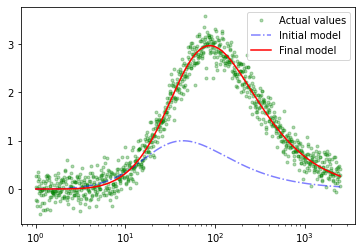

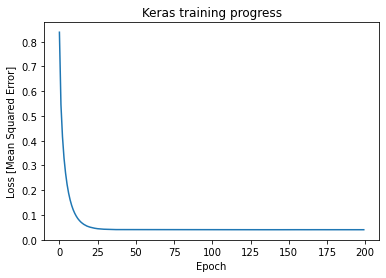

In [6]:
final_model = MonoexponentialModel()

final_model.compile(run_eagerly=False,
                    loss=tf.keras.losses.MSE,
                    optimizer=tf.optimizers.Adagrad(learning_rate=LEARNING_RATE))

history = final_model.fit(frequency, actual_dlts, epochs=200, batch_size=100, verbose=False)

print_results(frequency = frequency,
              actual_dlts = actual_dlts,
              initial_model = initial_model,
              final_model = final_model,
              history = history
             )

# Оптимизация параметров модели алгоритмом Adamax

Initial values:
Time constant power = -2.0000 log10(s)
Time constant = 0.0100 s
Amplitude = 1.0000 pF
MSE = 1.1796
RMSE = 1.086071

Final values:
Time constant power = -2.2912 log10(s)
Time constant = 0.0051 s
Amplitude = 2.9824 pF
MSE = 0.0410
RMSE = 0.202433


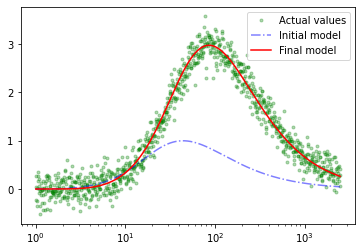

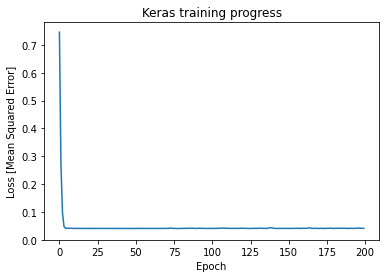

In [7]:
final_model = MonoexponentialModel()

final_model.compile(run_eagerly=False,
                    loss=tf.keras.losses.MSE,
                    optimizer=tf.optimizers.Adamax(learning_rate=LEARNING_RATE))

history = final_model.fit(frequency, actual_dlts, epochs=200, batch_size=100, verbose=False)

print_results(frequency = frequency,
              actual_dlts = actual_dlts,
              initial_model = initial_model,
              final_model = final_model,
              history = history
             )